In [12]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
num_classes = 10
input_shape = (28,28,1)

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()



In [3]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

print("X train shape : ",X_train.shape)
print(X_train.shape[0],"train samples")
print(X_test.shape[0],"train samples")

y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

X train shape :  (60000, 28, 28, 1)
60000 train samples
10000 train samples


In [4]:
model = keras.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(input_shape)))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dropout(.5))
model.add(layers.Dense(num_classes,activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
model.compile(optimizer = "adam",loss="categorical_crossentropy",metrics=["acc"])

In [6]:
history = model.fit(X_train,y_train,epochs=5,validation_split=.1,batch_size=128)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 12s 228us/sample - loss: 0.3596 - acc: 0.8899 - val_loss: 0.0822 - val_acc: 0.9780
Epoch 2/5
54000/54000 [==============================] - 11s 206us/sample - loss: 0.1149 - acc: 0.9653 - val_loss: 0.0608 - val_acc: 0.9833
Epoch 3/5
54000/54000 [==============================] - 11s 204us/sample - loss: 0.0844 - acc: 0.9742 - val_loss: 0.0490 - val_acc: 0.9872
Epoch 4/5
54000/54000 [==============================] - 11s 204us/sample - loss: 0.0693 - acc: 0.9794 - val_loss: 0.0425 - val_acc: 0.9877
Epoch 5/5
54000/54000 [==============================] - 11s 204us/sample - loss: 0.0609 - acc: 0.9807 - val_loss: 0.0395 - val_acc: 0.9883


In [25]:
score = model.evaluate(X_test,y_test)
print("Test loss",score[0])
print("Test acc: ",score[1])

10000/10000 [==============================] - 1s 127us/sample - loss: 0.0338 - acc: 0.9883
Test loss 0.03377383804323617
Test acc:  0.9883


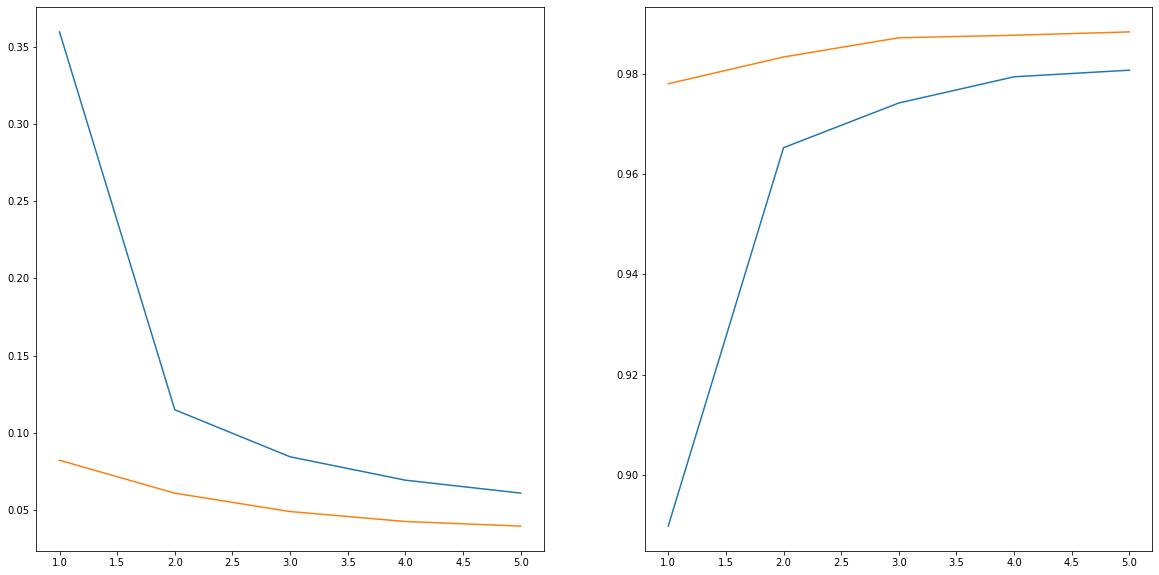

In [24]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc= history.history["acc"]
val_acc = history.history["val_acc"]

epochs = np.arange(1,len(acc)+1)

plt.figure(figsize=(20,10))
ax1 = plt.subplot(121)
ax1.plot(epochs,loss)
ax1.plot(epochs,val_loss)

ax2 = plt.subplot(122)
ax2.plot(epochs,acc)
ax2.plot(epochs,val_acc)
plt.show()

{'loss': [0.3595596337362572,
  0.1148570584974907,
  0.08442147566212548,
  0.06927274221623385,
  0.0608950972325272],
 'acc': [0.88985187, 0.96525925, 0.9741667, 0.9793889, 0.9807037],
 'val_loss': [0.08219101782639822,
  0.06084791471560796,
  0.04896754915018876,
  0.042516064325968425,
  0.039542850037415825],
 'val_acc': [0.978, 0.98333335, 0.98716664, 0.98766667, 0.98833334]}